## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load the dataset


In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Select numerical features


In [7]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]


## Standardize features


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Find optimal number of clusters using silhouette score


In [10]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil_scores = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

## Use the optimal k (largest silhouette score)


In [11]:
optimal_k = K[np.argmax(sil_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

## PCA for 2D visualization


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids)

## Plot clusters and centroids


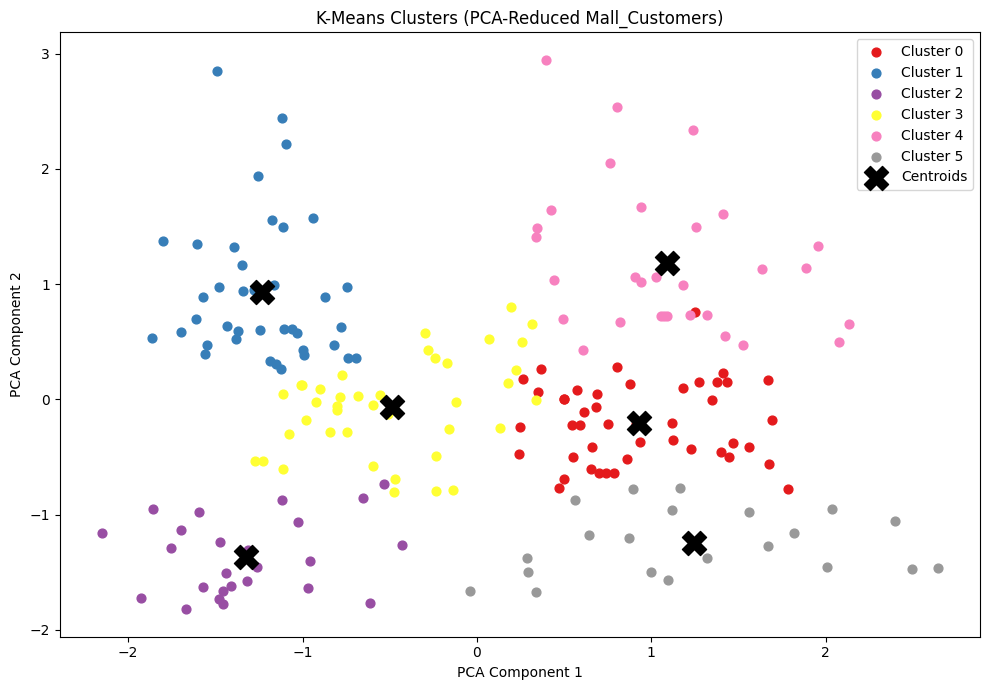

In [13]:
plt.figure(figsize=(10, 7))
colors = plt.cm.Set1(np.linspace(0, 1, optimal_k))
for i in range(optimal_k):
    plt.scatter(X_pca[labels==i, 0], X_pca[labels==i, 1],
                s=40, color=colors[i], label=f'Cluster {i}')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='X', s=300, c='black', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.title('K-Means Clusters (PCA-Reduced Mall_Customers)')
plt.tight_layout()
plt.show()

## Print summary of clusters


In [14]:
summary = []
for i in range(optimal_k):
    cluster = df[labels==i]
    size = len(cluster)
    means = cluster[features].mean().to_dict()
    row = {'Cluster': i, 'Size': size, **means}
    summary.append(row)
summary_df = pd.DataFrame(summary)
print(summary_df)


   Cluster  Size        Age  Annual Income (k$)  Spending Score (1-100)
0        0    45  56.333333           54.266667               49.066667
1        1    39  32.692308           86.538462               82.128205
2        2    25  25.560000           26.480000               76.240000
3        3    40  26.125000           59.425000               44.450000
4        4    30  44.000000           90.133333               17.933333
5        5    21  45.523810           26.285714               19.380952
